# Lab 3
Kimya, Rini, Jacinta

### 1) Background

#### 1.1) Defining Filters & Why We Care

Data filtering refers to reducing the content of noise or errors to refine data sets. Filtering can also be referred to as "subsetting" data, or choosing a smaller part of a data set for viewing or analysis. This is a critical process because measurement noise masks key features in the data, thus limiting its usefulness. Different types of data filters can be used to clean data in order to amend reports, query results, etc. 

#### 1.2) Examples & Applications

Examples of filters in day to day life include coffee filters and filters in fish tanks. There are also various kinds of filters used in data analysis. Filtering data can be as simple as removing certain data points (for example, invalid data) or filtering to manipulate sample characteristics (for example, filtering a questionnaire so only responses generated by females are analyzed). 

Linear filters serve the purposes of removing or retaining certain types of frequency behavior from a time series realization (Woodward et al., 2017). A common application of linear filters is to “filter out” certain types of frequencies from a set of data. More specifically, low-pass filters are designed “to remove the higher frequency behavior in a set of data while high-pass filters remove the lower frequencies” (Woodward et al., 2017). Other types of filters are band-pass  filters  that  “pass  frequencies  in  a  certain  frequency  band  through  the filter and band-stop (or notch) filters that pass frequencies except those in a certain frequency band or range” (Woodward et al., 2017). 

### 2) Methods

In [ ]:
install.packages("tswge")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘signal’, ‘PolynomF’, ‘waveslim’, ‘astsa’




In [ ]:
library("tswge")

#### 2.1) Dataset

We chose to use a dataset containing Oceanic Niño Index (ONI) values. ONI is a metric used to determine the presence of a weather pattern known as the El Niño Southern Oscillation (ENSO); it is "a three-month moving average of sea surface temperature (SST) anomalies in the Niño 3.4 region in the equatorial Pacific which is .5 °C above or below the average for that time of the year" (Lam et al. 2019). We chose to filter the ONI dataset for the years 1964 through 2017 to keep the dataset consistent with what we used for Lab 1, so we can compare results.

In [ ]:
# Define the URL, scrub the file name from the URL and download to /tmp
oni.url <- "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"
oni.name <- tail(unlist(strsplit(oni.url, "/")), n=1)
oni.file <- paste("/tmp/", oni.name, sep="")
download.file(oni.url, oni.file, method = 'auto')

In [ ]:
# Create a dataframe with the years of interest (1964-2017)
oni.df <- read.table(oni.file, header = TRUE)
oni.df = oni.df[!oni.df$YR > 2017,] 
oni.df = oni.df[!oni.df$YR < 1964,]

#### 2.2) Summary Stats

The dataset contains 12 data points per year, and there are 54 years in the dataset. There are 648 points in the dataset.

#### 2.3) Applying Two Tyes of Filters 

We chose to apply a low-pass filter with a cutoff value fc equal to .05 because we thought this could filter some of the noise.

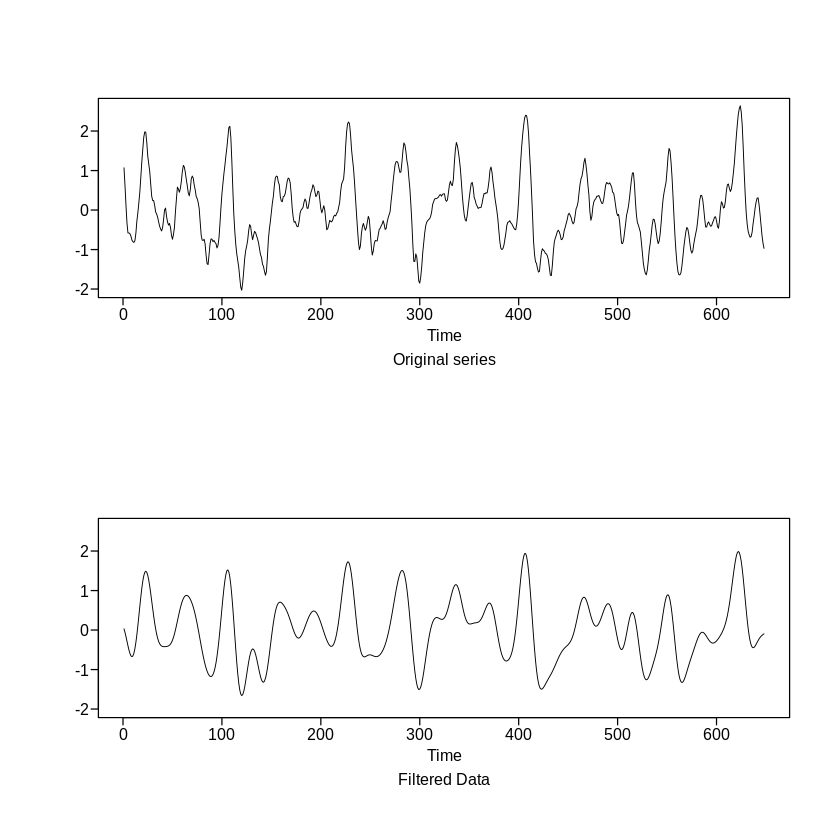

In [ ]:
oni_low <- butterworth.wge(oni.df$ANOM, type = 'low', cutoff = .05)

The low-pass filter does appear to have filtered some noise from the datset; the function appears smoother now. We will now apply a high-pass filter with fc equal to .2 for comparison.

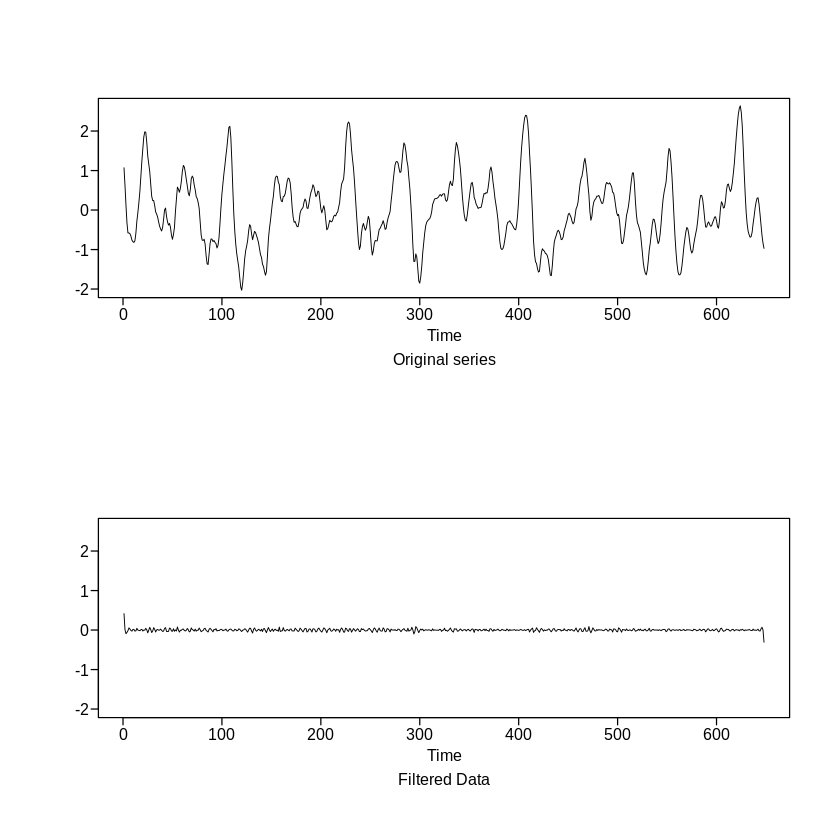

In [ ]:
oni_high <- butterworth.wge(oni.df$ANOM, order = 3, type = 'high', cutoff = .2)

In [ ]:
oni.df.subset <- oni.df$ANOM[3:length(oni.df$ANOM)]

The high pass filter clearly filtered all valuable information from the data. It is interesting to see its effect on this particular dataset.

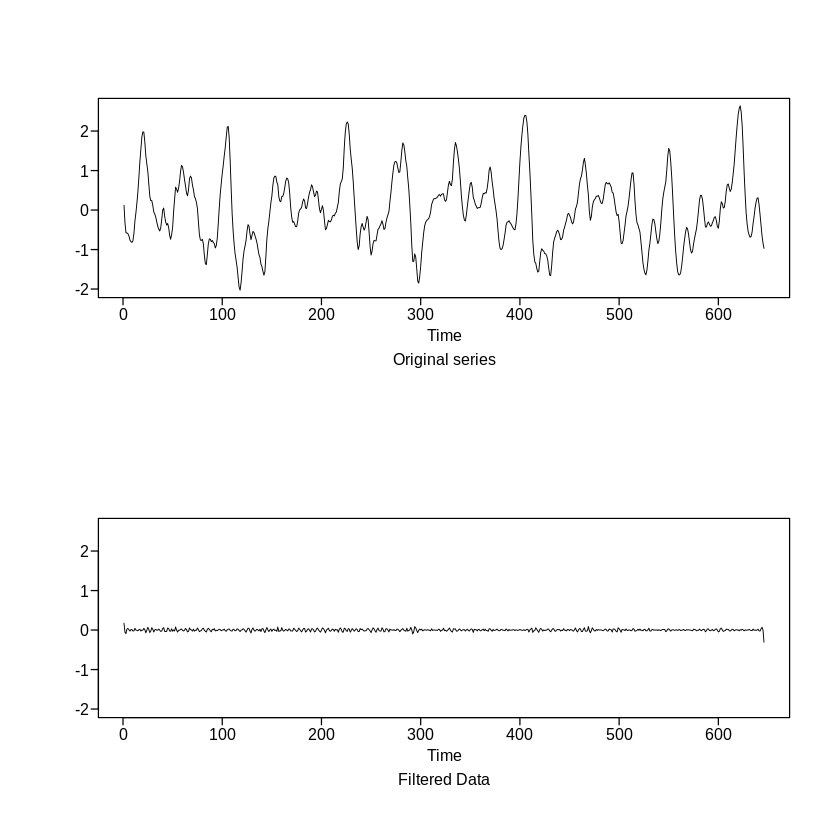

In [ ]:
oni_high_subset <- butterworth.wge(oni.df.subset, order = 3, type = 'high', cutoff = .2)

### 3) Results

#### 3.1) Plot the realization, autocorrelation, and periodogram of original data

In [ ]:
orig_oni <- ts(oni.df$ANOM, start = c(1964,1), frequency = 12)
oni_low_ts <- ts(oni_low$x.filt, start = c(1964,1), frequency = 12)
oni_high_ts <- ts(oni_high$x.filt, start = c(1964,1), frequency = 12)
oni_high_subset_ts <- ts(oni_high_subset$x.filt, start = c(1964,1), frequency = 12)

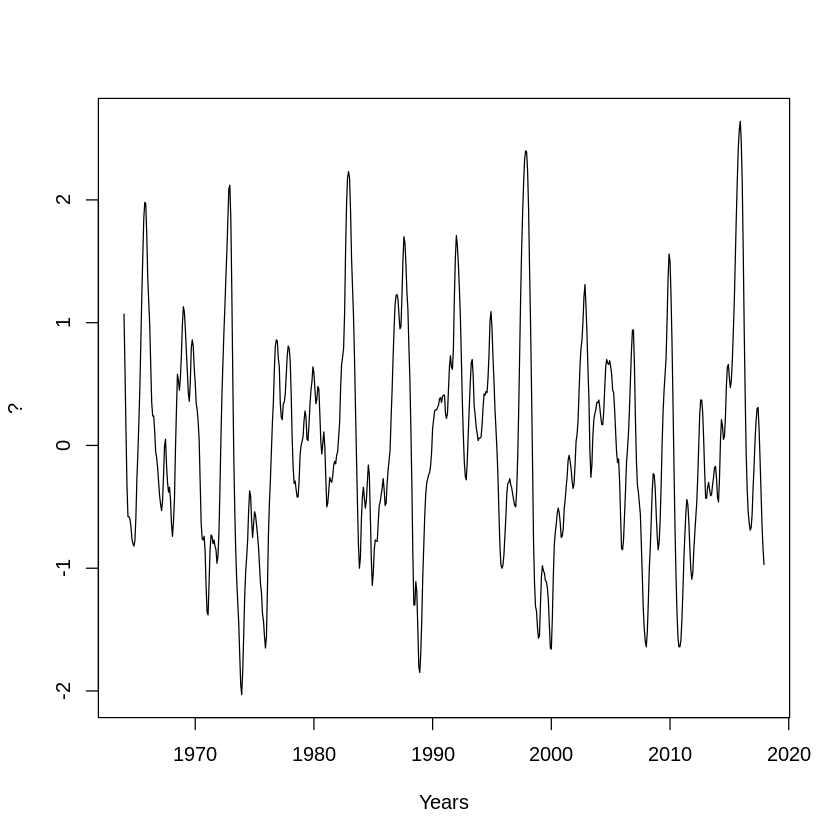

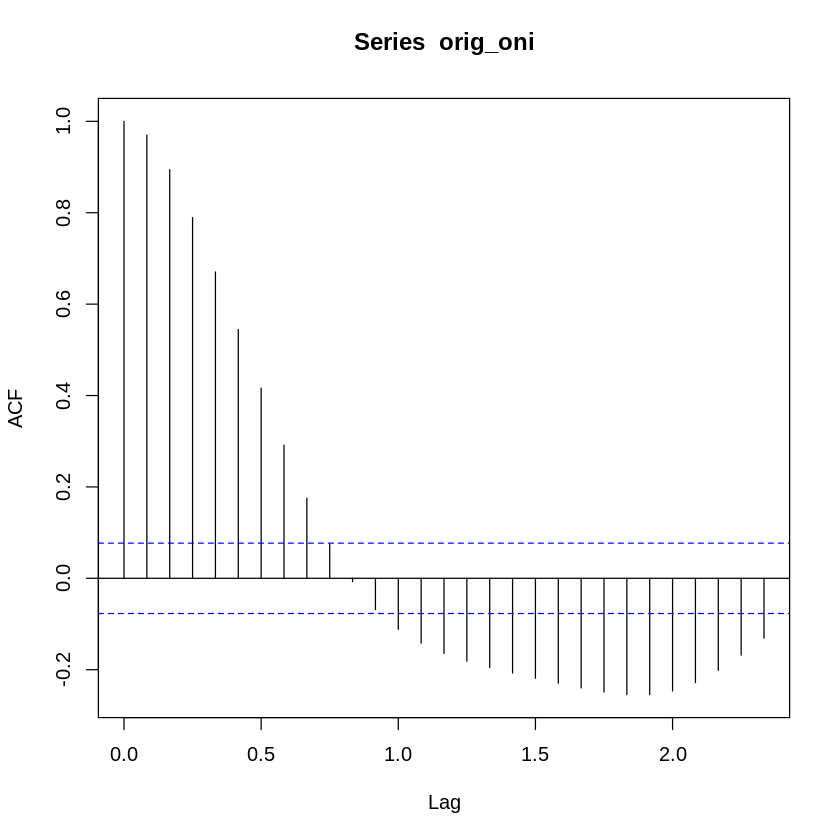

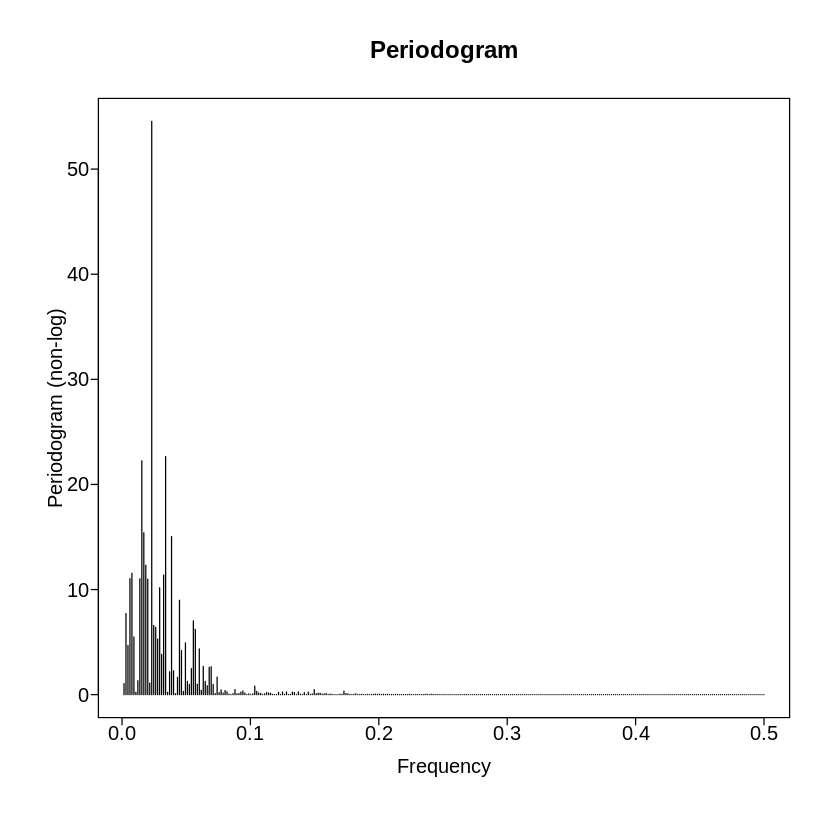

In [ ]:
plot(orig_oni, xlab = "Years", ylab = "?")
orig_oni_acf <- acf(orig_oni)
orig_oni_p <- period.wge(orig_oni, dbcalc = F)

In [ ]:
dom.freq <- orig_oni_p$freq[orig_oni_p$pgram > 50]
period <- 1/dom.freq
period

[1] 43.2

#### 3.2) Replot the realization, sample autocorrelations, and Parzen window-based spectral density for each of the filtered realizations

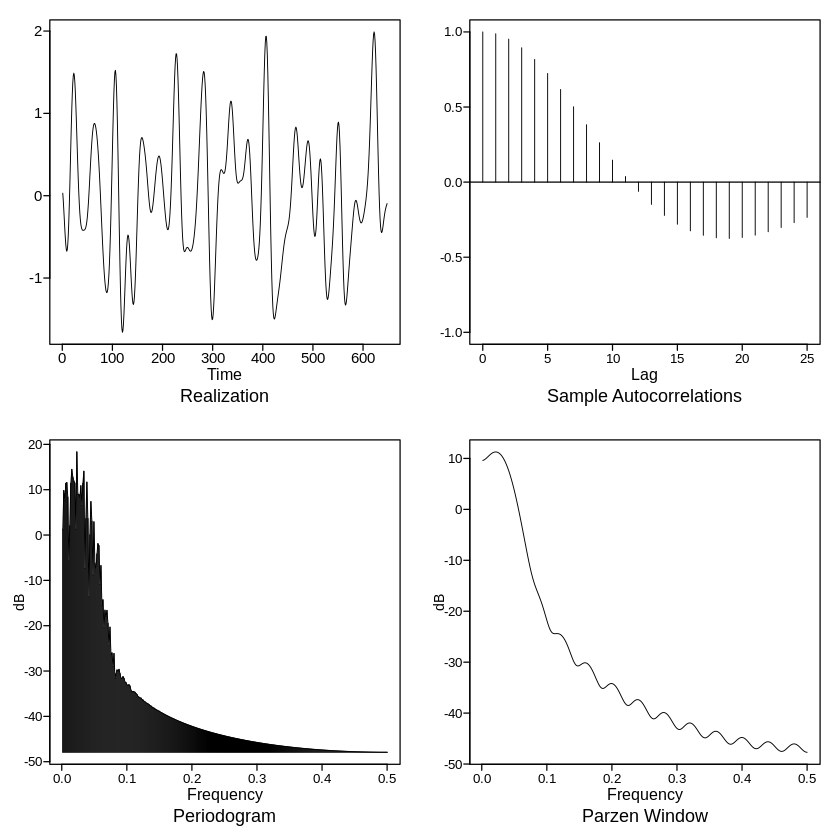

In [ ]:
# plot(oni_low_ts, xlab = "Years", ylab = "?")
low_oni_p <- plotts.sample.wge(oni_low_ts)

[1] 43.2

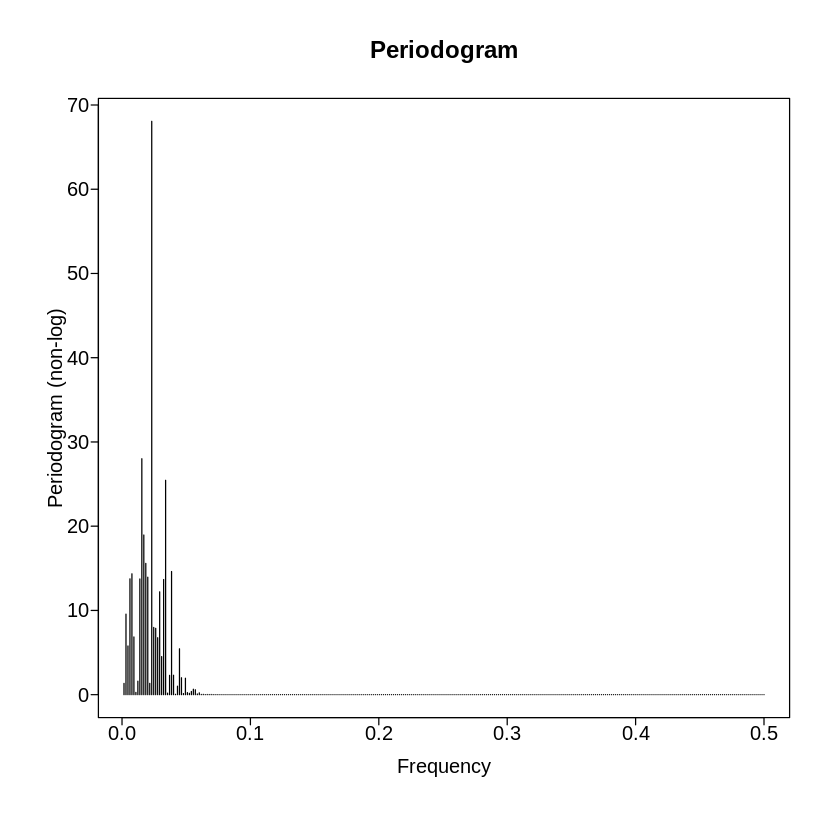

In [ ]:
oni_low_period <- period.wge(oni_low_ts, dbcalc = F)
dom.freq2 <- oni_low_period$freq[oni_low_period$pgram>60]
period2 <- 1/dom.freq2
period2

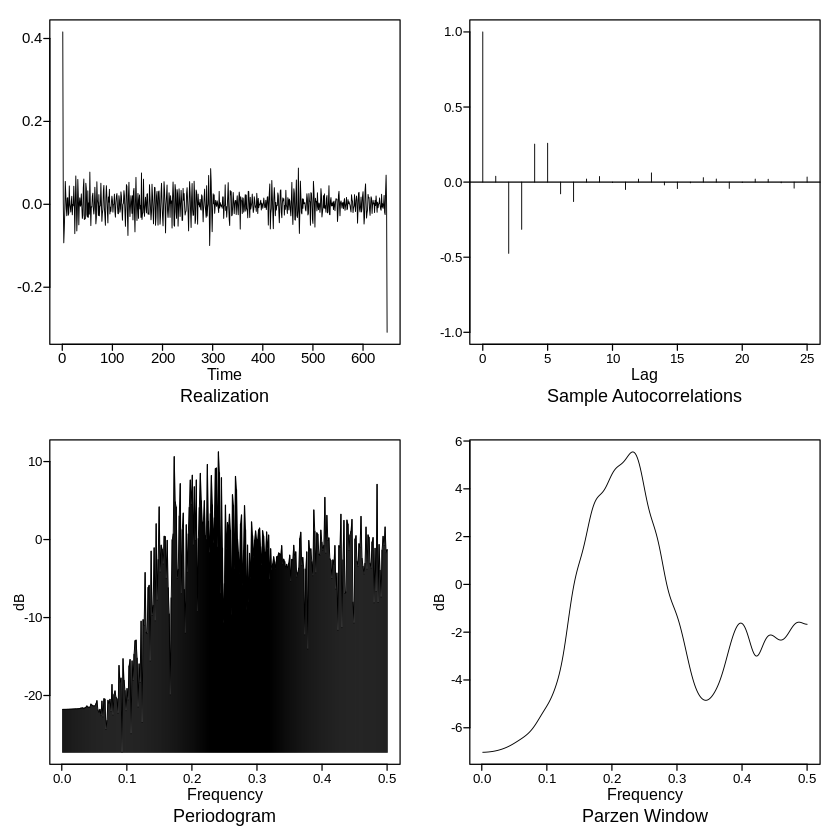

In [ ]:
high_oni_p <- plotts.sample.wge(oni_high_ts)

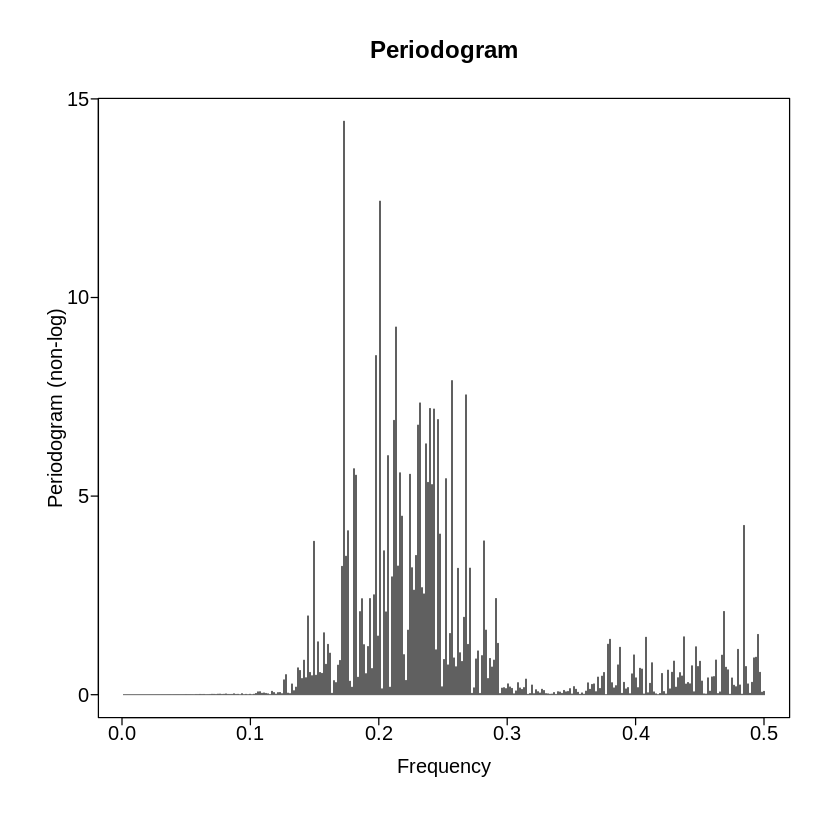

[1] 5.783784 4.976744

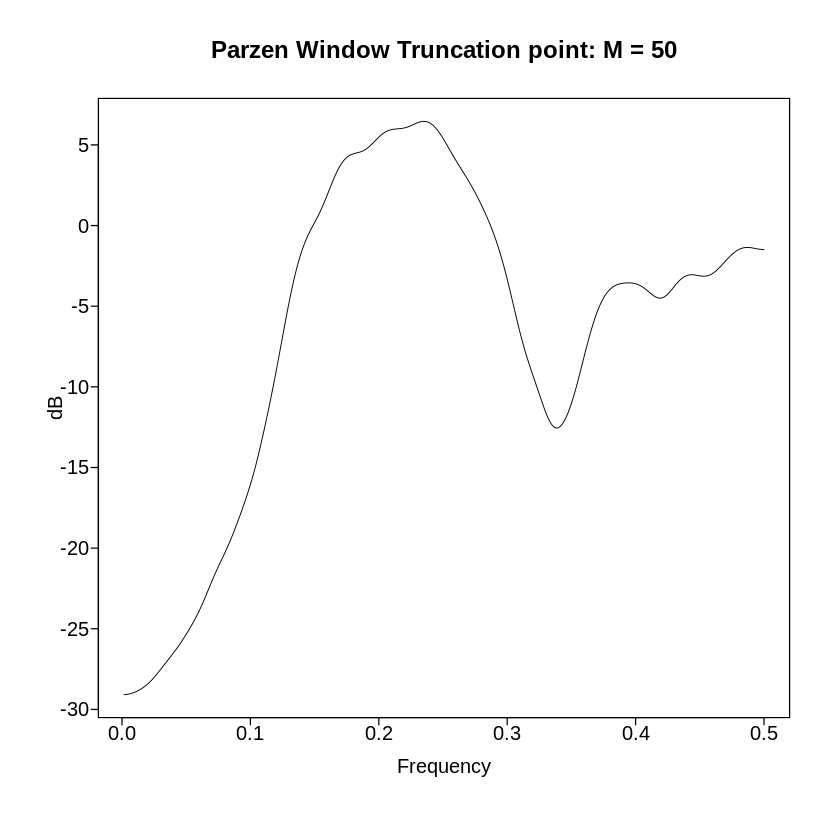

In [ ]:
oni_high_ts <- oni_high_ts[2:(length(oni_high_ts)-1)]
oni_high_period <- period.wge(oni_high_ts, dbcalc = F)
dom.freq3 <- oni_high_period$freq[oni_high_period$pgram>10]
oni_high_parzen <- parzen.wge(oni_high_ts)
period3 <- 1/dom.freq3
period3

### 4) Discussion/Conclusion

The purpose of this lab was to develop familiarity with the butterworth function from the “twsge” library by experimenting with the application of filters to data sets. Originally, our group selected the ‘sunspot data set’, but the data did not have enough ‘noise’ which in turn led to a lack of interesting observations to discuss. Consequently, we instead picked the ‘ONI data set’ from a previous assignment in hopes of yielding more intriguing results. We thought because the ONI data set was a bit more “wild” that there could be irrelevant frequencies possibly caused by various kinds of earth or weather interference that we could then filter out. However, as shown by our plots above, the dataset was not much more interesting than the sunspot data to apply filters to. Nevertheless, this lab assignment has improved our understanding of how to use the butterworth function. 

The realization of the original data can be characterized as weakly stationary and periodic. The parzen window demonstrates a dominant frequency around 0.02 corresponding to a period of a little over four years. The autocorrelations indicate strong positive lags for the subsequent years. Furthermore, there is observed oscillatory behavior. 

The realization of the data after applying the low-pass filter is nearly exactly the same as that of the original data. However, applying the filter appeared to have smoothed the realization. Perhaps to some extent it did filter out noise or irrelevant data. The dominant frequency and corresponding period have been preserved, as shown by the Parzen window. 

The high-pass filter filtered out all the interesting data because most frequencies in the dataset are below a value of 0.2. Furthermore, there is a deadline at 0 for the filtered data. Though the low-pass filter with a cut off value of 0.05 did help clean the data set and demonstrate the useful nature of applying a filter. In the periodogram for the regular data for the  and low-pass filter we can observe the correlation between the periodogram and filter between .2. 

Although the periodogram for the high-pass filter appears to reveal the presence of some frequencies, these are measured on a scale of 0-15 (dB). The periodogram for the original time series is on a scale of 0-70. Thus, even though the periodogram for the high-pass filter shows there are frequencies and information there, they are weak compared to the frequencies in the new data set as shown by the shrunk scale on the y-axis.


### 5) References

Woodward, W. A., Gray, H. L., & Elliott, A. C. (2017). Applied Time Series Analysis with R (2nd 
     ed.). CRC Press. https://doi.org/10.1201/9781315161143 
     